In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Ler o arquivo iris.csv em um dataframe

In [2]:
df = pd.read_csv("iris.csv")

In [36]:
df.head(150)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Analise exploratória de dados

### Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna Species

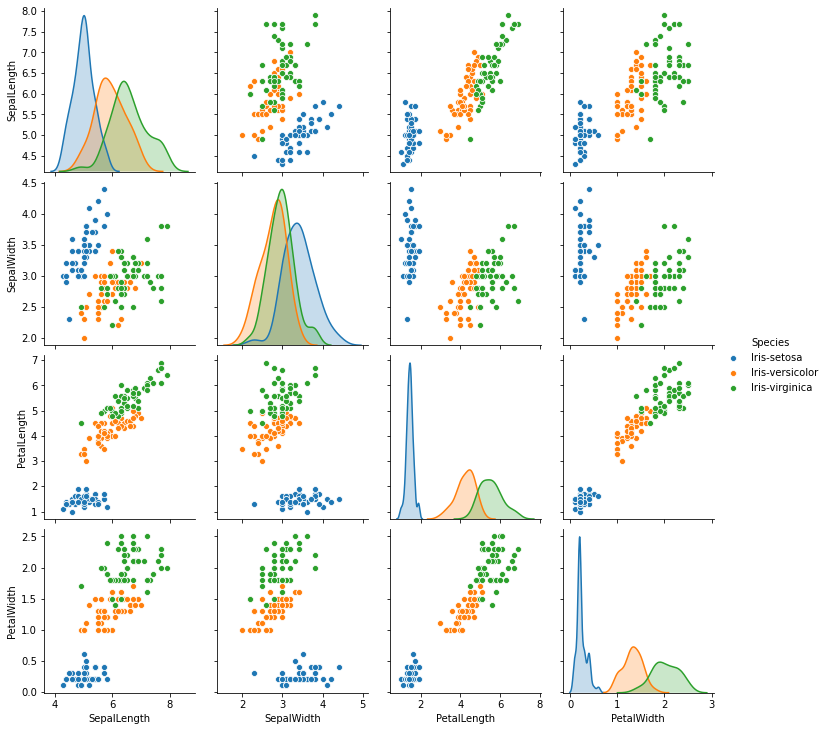

In [4]:
sns.pairplot(df, hue='Species')

# Padronizando as variaiveis

# Import StandarScaler do Scikit-learn

In [5]:
from sklearn.preprocessing import StandardScaler

### Objeto StandardScaler() chamado Scaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('Species', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

### Usando o método transform() para transformar em uma versão padronizada

In [9]:
parametros_padronizados = scaler.transform(df.drop('Species', axis=1))

### Converta os parametros padronizados em um DataFrame e verifique o cabeçalho desse DF para garantir que o transform funcionou

In [10]:
parametros_padronizados

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [11]:
df_param = pd.DataFrame(parametros_padronizados, columns=df.columns[:-1])
df_param.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Divisão Treino-teste

### Usando o método train_test_split para dividir os dados em um conjunto treino e teste

In [12]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['Species'], test_size=0.3)

# Usando o KNN
### Importando o KNeighborClassifier do sklearn

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

### Criando uma instancia do modelo KNN com n_neighbors = 1

In [65]:
knn = KNeighborsClassifier(n_neighbors=10)

### Ajuste este modelo KNN aos dados de treinamento

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Previsões e avaliações

* Usando o método de previsão para prever valores usando seu modelo KNN e X_test

In [67]:
pred = knn.predict(X_test)

###  Crie uma matriz de confusaõ e um relatório de classificação

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(confusion_matrix(y_test, pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [69]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Escolhendo o valor K

#### Criando um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do erro_rate para cada um desses modeles com uma lista.

In [73]:
taxa_erro = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    taxa_erro.append(np.mean(pred!=y_test))

### Criando grafico usando as informações do seu loop

Text(0.5, 1.0, 'Taxa de erro vc Valor K')

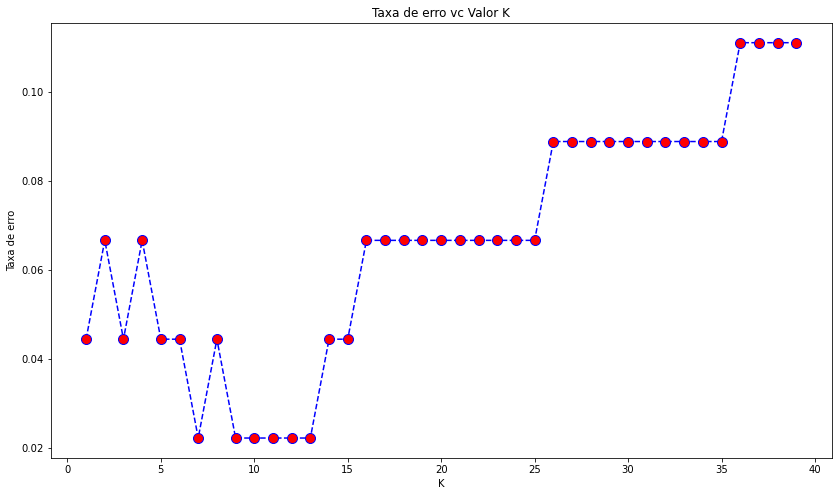

In [74]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), taxa_erro, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.title('Taxa de erro vc Valor K')

### Treinando novamente com o novo valor K = 10

In [78]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

